In [1]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Datenerfassung und -analyse

In [6]:
#loading tge data from csv file to a pandas Dataframe
insurance_dataset=pd.read_csv('insurance.csv')

In [8]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
insurance_dataset.shape

(1338, 7)

In [12]:
#getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Datenanalyse

In [17]:
#statistische Messungen des Datensatzes
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\icho2\AppData\Local\Temp\ipykernel_11340\2230332379.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


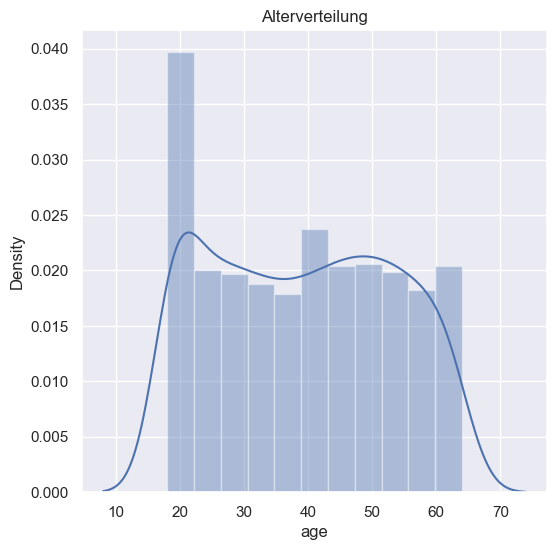

In [19]:
#Verteilung von Alter
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Alterverteilung')
plt.show()

C:\Users\icho2\AppData\Local\Temp\ipykernel_11340\219117687.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


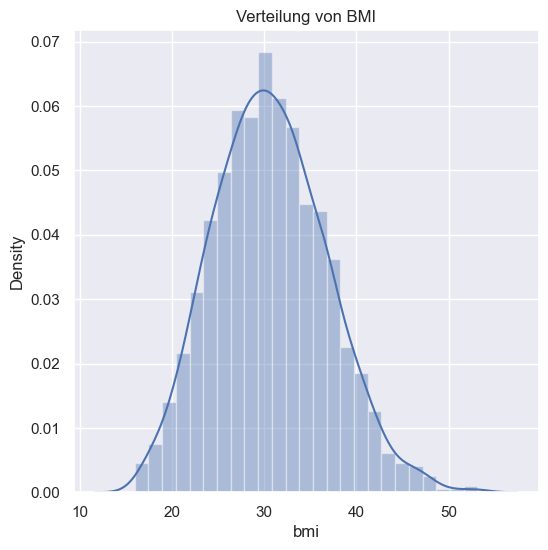

In [20]:
#BMI Verteilung
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('Verteilung von BMI')
plt.show()

* Das Alter der Versicherten in diesem Datensatz liegt zwischen 18 und 65 Jahren. Die Zahl der Menschen in den verschiedenen Altersgruppen ist recht gleichmäßig. Junge Menschen im Alter von 18 bis 22 Jahren machen die größte Zahl im Datensatz aus.
* Der BMI liegt zwischen etwa 15 und über 50. Dieses Diagramm ist leicht right-skewed , mit Outliers in die richtige Richtung, auf der größeren Seite

C:\Users\icho2\AppData\Local\Temp\ipykernel_11340\4146143046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sex', data=insurance_dataset,palette={"male": 'blue', "female": 'pink'})


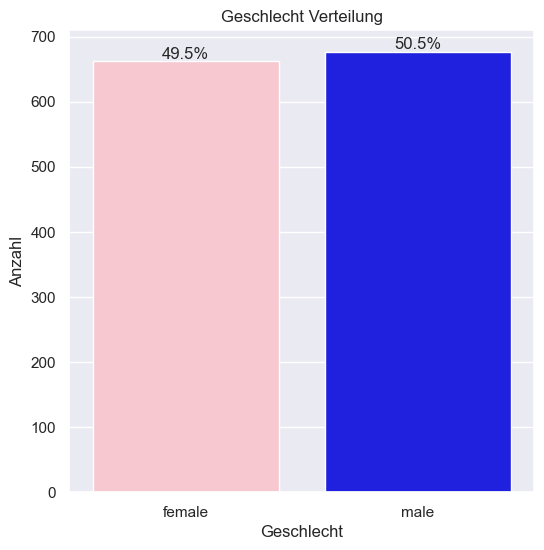

In [23]:
total_count = len(insurance_dataset)

plt.figure(figsize=(6, 6))
ax = sns.countplot(x='sex', data=insurance_dataset,palette={"male": 'blue', "female": 'pink'})
plt.title('Geschlecht Verteilung')
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total_count:.1f}%'  
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')  

plt.xlabel("Geschlecht")
plt.ylabel("Anzahl")
plt.show()


In [25]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\icho2\AppData\Local\Temp\ipykernel_11340\1922385281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='children',data=insurance_dataset,palette="pastel")


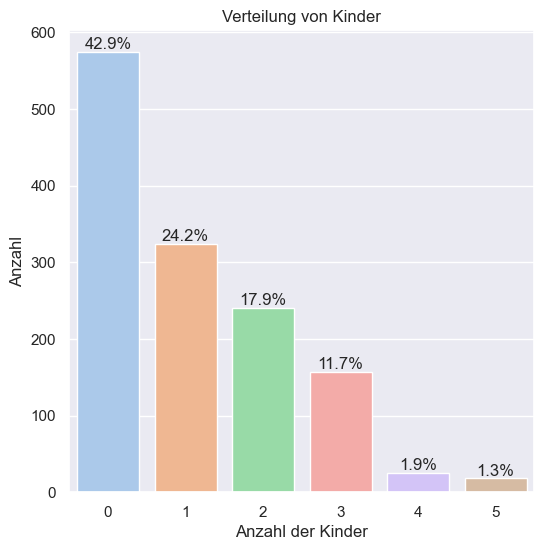

In [27]:
#Kinderverteilung
plt.figure(figsize=(6,6))
ax=sns.countplot(x='children',data=insurance_dataset,palette="pastel")
plt.title('Verteilung von Kinder')
for p in ax.patches:
    count = p.get_height()  
    percentage = f'{100 * count / total_count:.1f}%'  
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom') 
plt.xlabel("Anzahl der Kinder")
plt.ylabel("Anzahl")
plt.show()

In [29]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

* Das Verhältnis von Männern und Frauen in diesem Datensatz ist ungefähr gleich und beträgt etwa 50 %. 
* Der Anteil der Nichtraucher beträgt etwa 80 %, der Anteil der Raucher beträgt 20 %. 
* Im obigen Datensatz haben etwa 40 % der Menschen keine Kinder. Etwa ein Viertel aller Menschen hat ein Kind. Der Anteil der Menschen mit 4 bzw. 5 Kindern liegt jeweils bei knapp über 1 %. 
* Mit 27 % leben die meisten Menschen im Südosten. Die Anzahl der Menschen in den übrigen Gebieten beträgt etwa 24 %.

C:\Users\icho2\AppData\Local\Temp\ipykernel_11340\2844491930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='smoker', data=insurance_dataset,palette={'yes': 'lightcoral', 'no': 'green'})


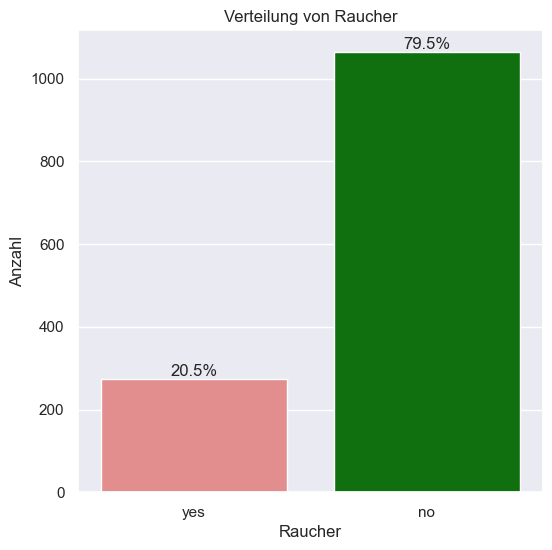

In [32]:
total = len(insurance_dataset)
plt.figure(figsize=(6,6))
ax = sns.countplot(x='smoker', data=insurance_dataset,palette={'yes': 'lightcoral', 'no': 'green'})
plt.title('Verteilung von Raucher')
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%' 
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()  
    ax.annotate(percentage, (x, y), ha='center', va='bottom')  
plt.xlabel("Raucher")
plt.ylabel("Anzahl")
plt.show()

In [34]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

C:\Users\icho2\AppData\Local\Temp\ipykernel_11340\2856747056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='region',data=insurance_dataset,palette="pastel")


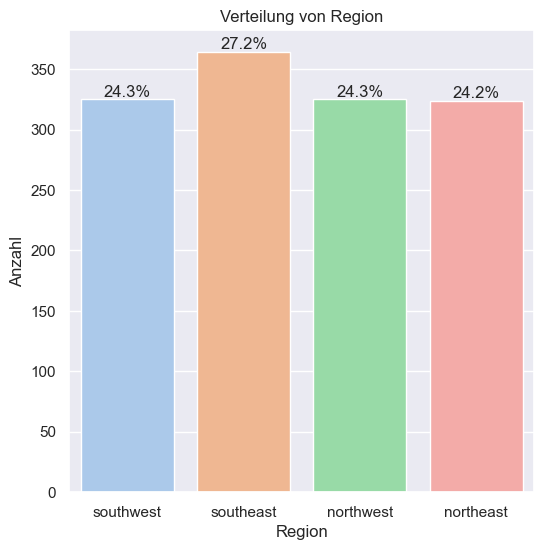

In [36]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='region',data=insurance_dataset,palette="pastel")
plt.title('Verteilung von Region')
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()  
    ax.annotate(percentage, (x, y), ha='center', va='bottom')  

plt.xlabel("Region")
plt.ylabel("Anzahl")
plt.show()

In [38]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\icho2\AppData\Local\Temp\ipykernel_11340\3318676421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=insurance_dataset,palette={"yes": "yellow", "no": "skyblue"})


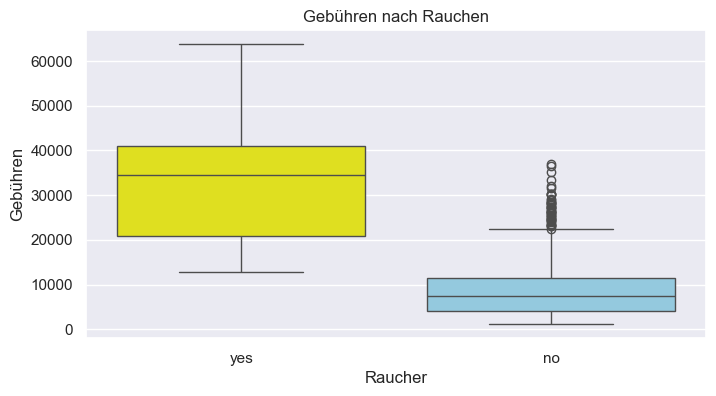

In [40]:
#Boxplot Gebühren nach Rauchen
plt.figure(figsize=(8, 4))
sns.boxplot(x='smoker', y='charges', data=insurance_dataset,palette={"yes": "yellow", "no": "skyblue"})
plt.title("Gebühren nach Rauchen")
plt.xlabel("Raucher")
plt.ylabel("Gebühren")
plt.show()

C:\Users\icho2\AppData\Local\Temp\ipykernel_11340\2573624443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=insurance_dataset,palette={"southwest": "lightcoral", "southeast": "blue","northwest":"lightyellow","northeast":"purple"})


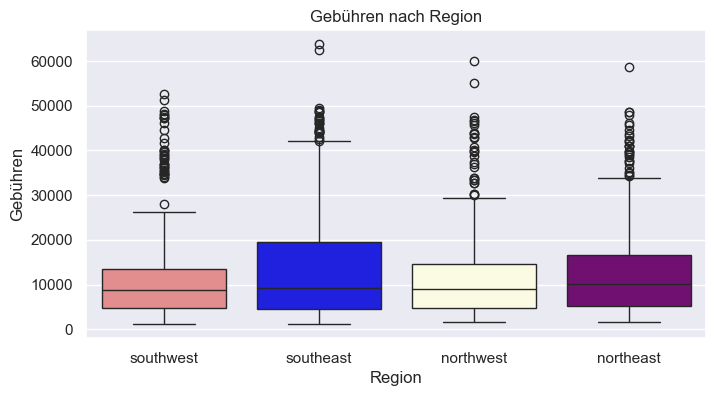

In [42]:
#Boxplot Gebühren nach Region
plt.figure(figsize=(8, 4))
sns.boxplot(x='region', y='charges', data=insurance_dataset,palette={"southwest": "lightcoral", "southeast": "blue","northwest":"lightyellow","northeast":"purple"})
plt.title("Gebühren nach Region")
plt.xlabel("Region")
plt.ylabel("Gebühren")
plt.show()

C:\Users\icho2\AppData\Local\Temp\ipykernel_11340\2619634532.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=insurance_dataset,palette={"female": "pink", "male": "blue"})


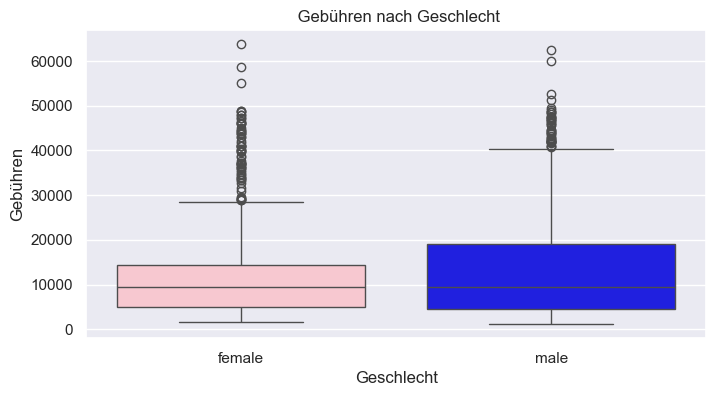

In [44]:
#Boxplot Gebühren nach Geschlecht
plt.figure(figsize=(8, 4))
sns.boxplot(x='sex', y='charges', data=insurance_dataset,palette={"female": "pink", "male": "blue"})
plt.title(" Gebühren nach Geschlecht")
plt.xlabel("Geschlecht")
plt.ylabel("Gebühren")
plt.show()

C:\Users\icho2\AppData\Local\Temp\ipykernel_11340\1373750656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='children', y='charges', data=insurance_dataset, palette="pastel")


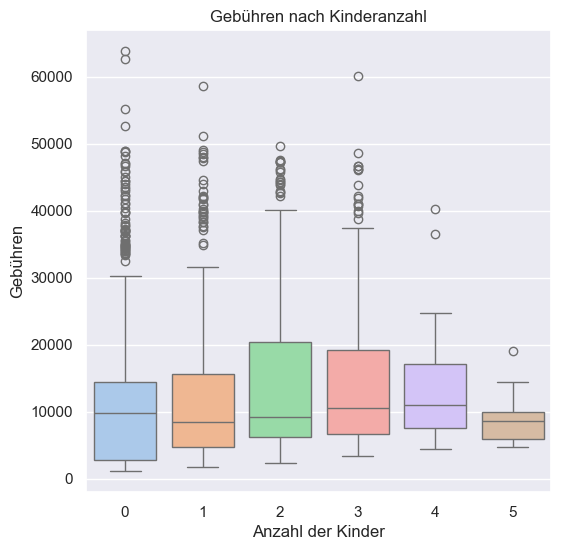

In [47]:
#Boxplot Gebühren nach Kinderanzahl
plt.figure(figsize=(6, 6))
sns.boxplot(x='children', y='charges', data=insurance_dataset, palette="pastel")
plt.title('Gebühren nach Kinderanzahl')
plt.xlabel("Anzahl der Kinder")
plt.ylabel("Gebühren")
plt.show()

* Es gibt einen großen Unterschied im Median zwischen Rauchern und Nichtrauchern, der bei etwa 35.000 bzw. etwa 7.500 liegt => Raucher müssen höhere Tarife zahlen, da Rauchen viele Krankheiten verursacht.Aber das Boxplot der Gebühren für die Zahl der Nichtraucher weist viele Outliers mit hohen Kosten auf
* Der Median der Gruppenregionen ist relativ einheitlich. Alle haben Outliers
* Der Median der männlichen und weiblichen Gruppen ist ungefähr gleich und beträgt mehr als 9000 USD. Beide Gruppen haben die Outliers mit hoher Versicherungsgebühren
* Der Median zwischen Gruppen mit unterschiedlicher Kinderzahl ist unterschiedlich, aber nicht sehr unterschiedlich. 

C:\Users\icho2\AppData\Local\Temp\ipykernel_4200\2690376348.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


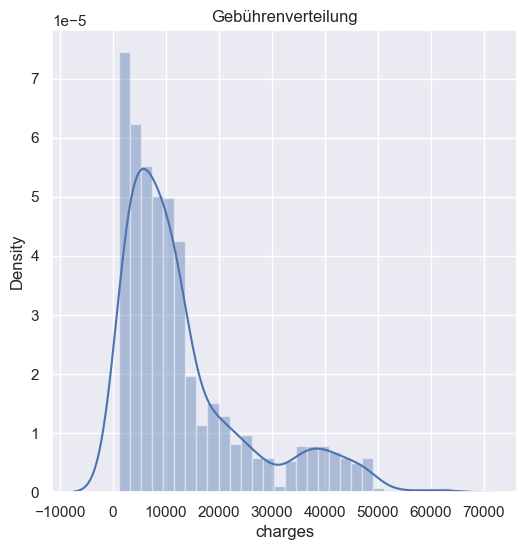

In [46]:
#Gebührenverteilung
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Gebührenverteilung')
plt.show()

* Das Gebührendiagramm ist stark right-skewed , mit vielen Ourliers auf der rechten Seite, auf der größeren Seite => die meisten Versicherungsgebühren sind recht niedrig

Data Preprocessing


Kodierung der kategorialen Merkmale

In [55]:
#Kodierung der Spalte „Geschlecht“
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
#Kodierung der Spalte „Raucher“
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
#Kodierung der Spalte 'region'
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
print(insurance_dataset.head())

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       0       1  16884.92400
1   18    0  33.770         1       1       0   1725.55230
2   28    0  33.000         3       1       0   4449.46200
3   33    0  22.705         0       1       3  21984.47061
4   32    0  28.880         0       1       3   3866.85520


C:\Users\icho2\AppData\Local\Temp\ipykernel_11340\108575654.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\icho2\AppData\Local\Temp\ipykernel_11340\108575654.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\icho2\AppData\Local\Temp\ipykernel_11340\108575654.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To r

Aufteilen der Features und des Ziels

In [58]:

X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [60]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Aufteilung der Daten in Trainingsdaten und Testdaten

In [63]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [65]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [69]:
regressor=LinearRegression()

In [71]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [74]:
#Vorhersage auf Basis von Trainingsdaten
training_data_prediction=regressor.predict(X_train)

In [76]:
#R-Quadrat-Werte: nahe bei 1
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print('R squared value : ',r2_train  )

R squared value :  0.751505643411174


In [78]:
#Vorhersage auf Basis von Testdaten
test_data_prediction=regressor.predict(X_test)

In [80]:
#R-Quadrat-Werte:
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R squared value : ',r2_test  )

R squared value :  0.7447273869684077


für gute Leistung: Der R-Quadrat-Wert aus Trainingsdaten und Testdaten muss nahezu gleich sein

Aufbau eines Vorhersagesystems

In [84]:
input_data=(31,1,25.74,0,1,0)
##Ändern der Eingabedaten in ein Numpy-Array
input_data_as_numpy_array=np.array(input_data)
#das Array neu formen
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)
print('Die Versicherungsgebühren betragen USD', prediction[0])

[3760.0805765]
Die Versicherungsgebühren betragen USD 3760.080576496055


C:\Users\icho2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Versicherungsgebühren in Realitaet ist: 3756.6216